## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: xlabel='date'>

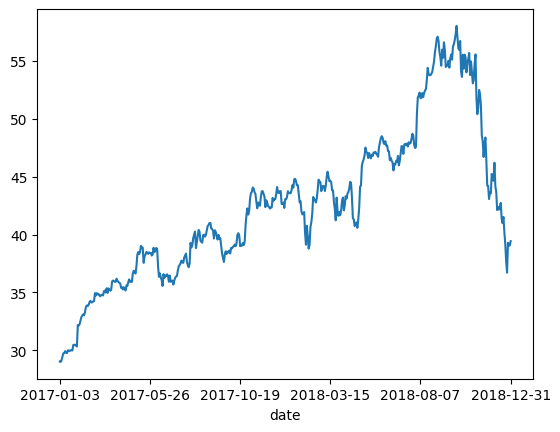

In [ ]:
import pandas_datareader.data as web
from datetime import datetime
data = web.DataReader('AAPL', 'iex', datetime(2017, 1,1), 
                      datetime(2018,12,31), api_key = 'pk_803a142bf6764826a701ef6d24725ccb')
data['close'].plot()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.



In [ ]:
Q1 = (data['close'].median() + data['close'].min())/2
Q2 = (data['close'].median() + data['close'].max())/2
IQR = Q2 - Q1
low = Q1 - (1.5)*IQR
up = Q2 + (1.5) * IQR
data[(data['close'] <= low) | (data['close'] >= up)] #нет выбросов

,open,high,low,close,volume
date,,,,,


## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

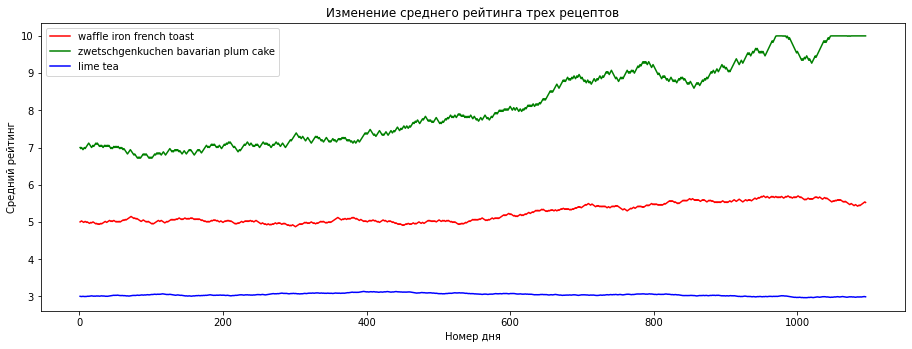

In [ ]:
average_ratings = np.load('average_ratings.npy')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 2, 1])
waffle, = ax.plot(list(range(1, len(average_ratings[0])+1)), 
                  average_ratings[0], 'r', label = 'waffle iron french toast')
cake, = ax.plot(list(range(1, len(average_ratings[1])+1)), 
                  average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
tea, = ax.plot(list(range(1, len(average_ratings[2])+1)), 
                  average_ratings[2], 'b', label = 'lime tea')

ax.legend(handles = [waffle, cake, tea], loc = 'upper left')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: UserWarning: Parsing '30-12-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


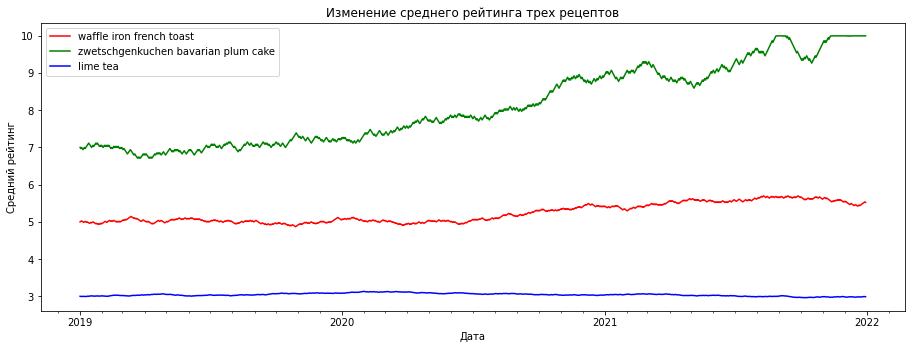

In [ ]:
import datetime as dt
period = pd.date_range(start= '01-01-2019', end = '30-12-2021', freq = '1D')
import matplotlib.ticker as ticker


fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 2, 1])
waffle, = ax.plot(period, average_ratings[0], 'r', label = 'waffle iron french toast')
cake, = ax.plot(period, average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
tea, = ax.plot(period, average_ratings[2], 'b', label = 'lime tea')

ax.legend(handles = [waffle, cake, tea], loc = 'upper left')
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

loc = mdates.YearLocator()
ax.xaxis.set_major_locator(loc)
loc1 = mdates.MonthLocator(interval=1)
ax.xaxis.set_minor_locator(loc1)


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

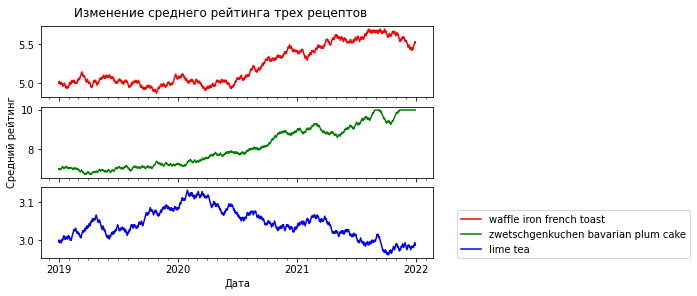

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, layout = 'constrained', sharex = 'col')
waffle, = ax[0].plot(period, average_ratings[0], 'r', label = 'waffle iron french toast')
cake, = ax[1].plot(period, average_ratings[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
tea, = ax[2].plot(period, average_ratings[2], 'b', label = 'lime tea')

ax[2].set_xlabel('Дата')
ax[1].set_ylabel('Средний рейтинг')
fig.suptitle('Изменение среднего рейтинга трех рецептов')

loc = mdates.YearLocator()
ax[2].xaxis.set_major_locator(loc)
loc1 = mdates.MonthLocator(interval=1)
ax[2].xaxis.set_minor_locator(loc1)
#fig.legend(handles = [waffle, cake, tea])
fig.legend(bbox_to_anchor=(1.6, 0.3))

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [ ]:
data = np.load('visitors.npy')

Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

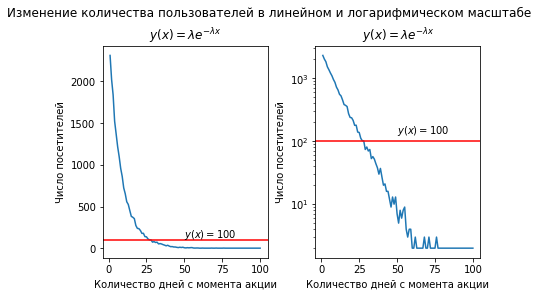

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, layout = 'constrained')
for ax in axes:
  ax.plot(list(range(1, len(data)+1)), data)
  ax.set_title('$y(x) = \lambda e^{-\lambda x}$')
  ax.axhline(y = 100, color = 'r', linestyle = '-')
  ax.text(50, 130,"$y(x) = 100$")
  ax.set_xlabel('Количество дней с момента акции')
  ax.set_ylabel('Число посетителей')
axes[1].set_yscale('log')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
reviews = pd.read_csv('reviews_sample.csv')
reviews.rename(columns={'Unnamed: 0':'index'}, inplace = True)
recipes = pd.read_csv('recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

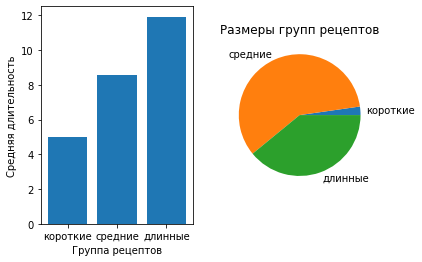

In [ ]:
short = recipes[recipes['minutes'] < 5]
middle = recipes[(recipes['minutes'] < 50) & (recipes['minutes'] >= 5)]
big = recipes[recipes['minutes'] >= 50]

mshort = short.loc[:,'n_steps'].mean()
mmiddle = middle.loc[:,'n_steps'].mean()
mbig = big.loc[:,'n_steps'].mean()

sshort = short.shape[0]
smiddle = middle.shape[0]
sbig = big.shape[0]

df = pd.DataFrame({'name':['короткие', 'средние', 'длинные'], 
                   'mean_steps':[mshort, mmiddle, mbig], 
                   'size':[sshort, smiddle, sbig]})
ax1 = plt.subplot(1, 2, 1)
plt.bar(list(df.index), df['mean_steps'])
plt.xticks(list(df.index), df['name'])
plt.xlabel('Группа рецептов')
plt.ylabel('Средняя длительность')
ax2 = plt.subplot(1, 2, 2)
plt.pie(df['size'], labels = df['name'])
plt.title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

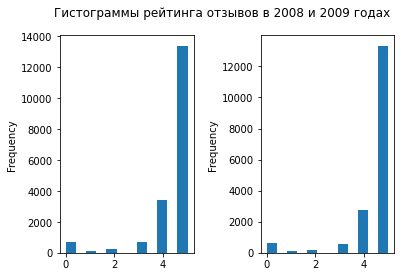

In [ ]:
reviews['date']=pd.to_datetime(reviews['date'])
reviews2009 = reviews[(reviews['date'] <= '2009-12-31') & (reviews['date'] >= '2009-1-1')]
reviews2008 = reviews[(reviews['date'] <= '2008-12-31') & (reviews['date'] >= '2008-1-1')]
fig = plt.figure()

plt.subplot(1, 2, 1)
reviews2008['rating'].plot.hist(bins = 12)

plt.subplot(1, 2, 2)
reviews2009['rating'].plot.hist(bins = 12)
plt.subplots_adjust(wspace=0.5)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах');

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

*Визуально линейная зависимость между двумя этими переменными отсутствует*

In [ ]:
recipes['group'] = None
recipes['group'] = np.where(recipes['minutes'] < 5, 'short', recipes['group'] )
recipes['group'] = np.where((recipes['minutes'] < 50) & (recipes['minutes'] >= 5), 'middle', recipes['group'])
recipes['group'] = np.where(recipes['minutes'] >= 50, 'big', recipes['group'] )
recipes

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

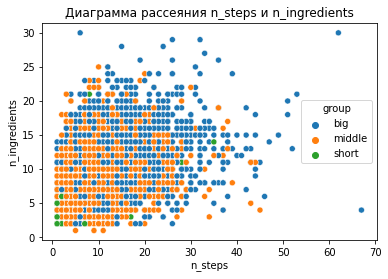

In [ ]:
tips = recipes
sns.scatterplot(data=tips, 
                x="n_steps", 
                y="n_ingredients", 
                hue = 'group').set_title('Диаграмма рассеяния n_steps и n_ingredients')


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

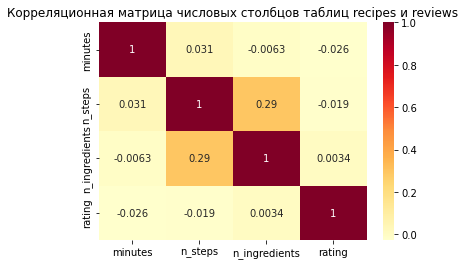

In [ ]:
merge_recipe = recipes.merge(reviews,how = 'right', left_on = 'id', 
                             right_on = 'recipe_id')

cor_matrix = merge_recipe[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr()
sns.heatmap(cor_matrix, annot=True, cmap = 'YlOrRd').set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews');
